In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,review_per_day,review_per_user,discussion_count,revert_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,12,25,81,...,2533,832,466,366,719,0.324452,3.044471,472,415,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,14,17,75,...,3947,1377,657,720,1136,0.509159,2.866376,970,721,1
2,The Fountainhead,180464,36772,6647,243,9321,924,11,21,54,...,2318,1104,486,618,971,0.296761,2.099638,218,228,1
3,Northern pintail,218361,13230,2453,66,3181,226,8,2,27,...,763,376,282,94,334,0.098706,2.029255,54,86,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,25,31,148,...,6417,2647,1281,1366,2296,0.766850,2.424254,847,1112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,2,0,7,...,89,53,41,12,46,0.011623,1.679245,12,3,0
5196,Minawara and Multultu,95240,421,83,4,101,6,1,0,1,...,34,29,27,2,29,0.004280,1.172414,3,1,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,1,0,1,...,45,34,30,4,32,0.005873,1.323529,3,2,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,3,2,7,...,72,47,44,3,42,0.009087,1.531915,6,0,0


In [ ]:
def train_and_evaluate_models(X, y, cv=5, test_size=0.2):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Initialize the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(),
        'MLP': MLPClassifier()
    }

    # Initialize a list to store the results
    results = []

    # Define custom scoring
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Loop through the models
    for model_name, model in models.items():
        # Perform cross-validation on the training set
        cv_results = {metric: cross_val_score(model, X_train, y_train, cv=skf, scoring=scorer).mean() for metric, scorer in scoring.items()}

        # Train the model on the full training set
        model.fit(X_train, y_train)

        # Predict the test set
        y_pred = model.predict(X_test)

        # Calculate the metrics on the test set
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, average='weighted')
        test_recall = recall_score(y_test, y_pred, average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        # Append the results to the list
        results.append({
            'Model': model_name,
            'CV Accuracy': cv_results['accuracy'],
            'CV Precision': cv_results['precision'],
            'CV Recall': cv_results['recall'],
            'CV F1 Score': cv_results['f1'],
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1
        })

    # Create a dataframe from the results
    results_df = pd.DataFrame(results)

    return results_df

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']

In [ ]:
result1 = train_and_evaluate_models(X, y)
result1

,Model,CV Accuracy,CV Precision,CV Recall,CV F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Logistic Regression,0.855529,0.855663,0.855529,0.855515,0.858654,0.858655,0.858654,0.858654
1,SVM,0.799279,0.806846,0.799279,0.797997,0.804808,0.811283,0.804808,0.803787
2,Random Forest,0.892548,0.893917,0.889663,0.890096,0.899038,0.899288,0.899038,0.899023
3,AdaBoost,0.888942,0.889897,0.888942,0.888875,0.883654,0.883894,0.883654,0.883636
4,XGBoost,0.898077,0.898583,0.898077,0.898042,0.898077,0.898554,0.898077,0.898046
5,MLP,0.810096,0.853530,0.849279,0.801238,0.771154,0.831591,0.771154,0.760228


### XGBoost

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_estimator(model ,X_test, y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       520
           1       0.88      0.92      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



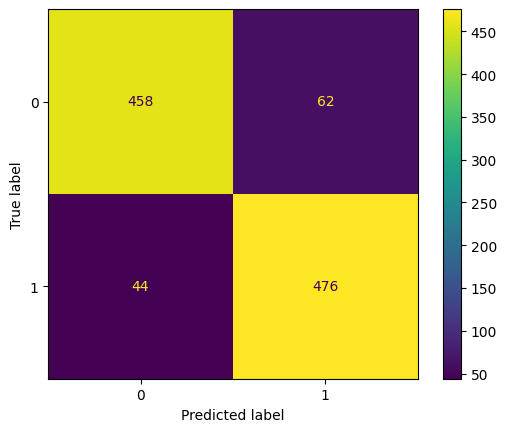

In [ ]:
eval(model_xgb, X_train, X_test)

In [ ]:
param_grid = {
    'booster': ['gbtree', 'dart'],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

In [ ]:
grid = GridSearchCV(model_xgb, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'], 'gamma': [0, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 3, 5]},
             verbose=3)

In [ ]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Estimator: {grid.best_estimator_}")

Best Parameters: {'booster': 'gbtree', 'gamma': 0, 'max_depth': 9, 'min_child_weight': 3}
Best Estimator: XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       520
           1       0.88      0.91      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040



- XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       520
           1       0.88      0.91      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



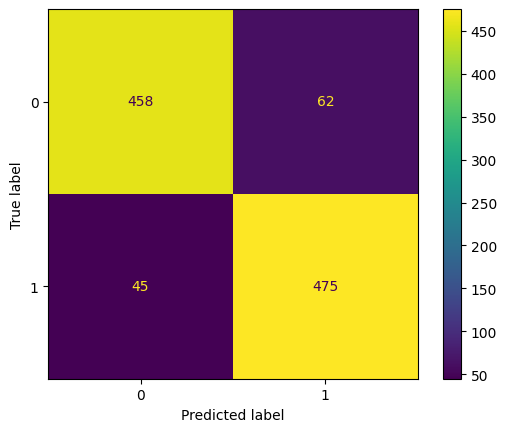

In [ ]:
eval(model_xgb, X_train, X_test)

### Random forest

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       520
           1       0.89      0.92      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



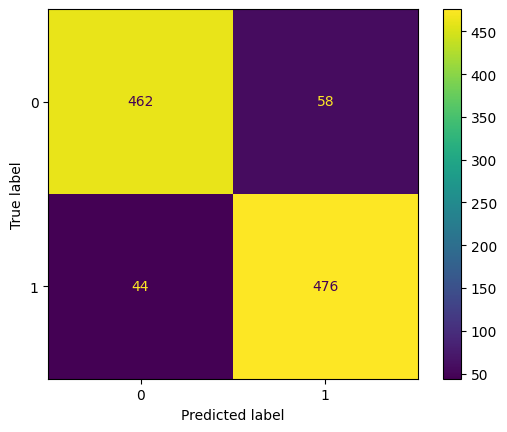

In [ ]:
eval(model_rf, X_train, X_test)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

In [ ]:
grid = GridSearchCV(model_rf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [ ]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Estimator: {grid.best_estimator_}")

Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 50}
Best Estimator: RandomForestClassifier(max_depth=30, n_estimators=50)


In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       520
           1       0.89      0.92      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040



- RandomForestClassifier(bootstrap=True, max_depth=30, max_features='sqrt', n_estimators=50)

In [ ]:
model_rf = RandomForestClassifier(bootstrap=True, max_depth=30, max_features='sqrt', n_estimators=50)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

Test_Set
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       520
           1       0.88      0.91      0.89       520

    accuracy                           0.89      1040
   macro avg       0.89      0.89      0.89      1040
weighted avg       0.89      0.89      0.89      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



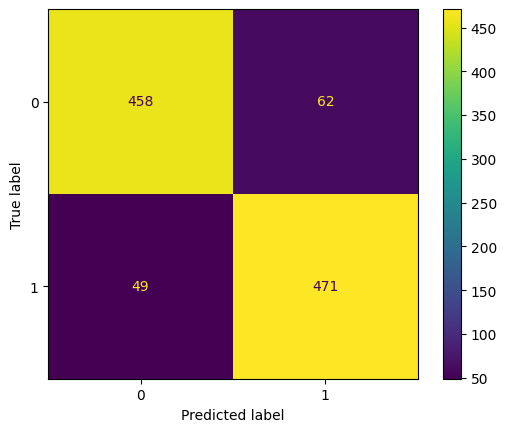

In [ ]:
eval(model_rf, X_train, X_test)

### Feature selection
- XGBoost

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
importances = model_xgb.feature_importances_
importance_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importance_df

,Importance
mean_paragraph_size,0.211294
abstract_size,0.128868
review_per_user,0.055432
discussion_count,0.035061
citation_count,0.034418
citation_per_text,0.025487
abstract_text_ratio,0.021599
SMOG,0.021063
exclamation_count,0.020198
internal_link_count,0.019805


In [ ]:
df_feature = df.copy()
df_feature.drop(['revert_count', 'image_count', 'word_count', 'num_occasional_editors', 'review_per_day', 'LIX'], axis=1, inplace=True)

In [ ]:
X = df_feature.iloc[:, 2:-1]
y = df_feature['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       520
           1       0.89      0.91      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



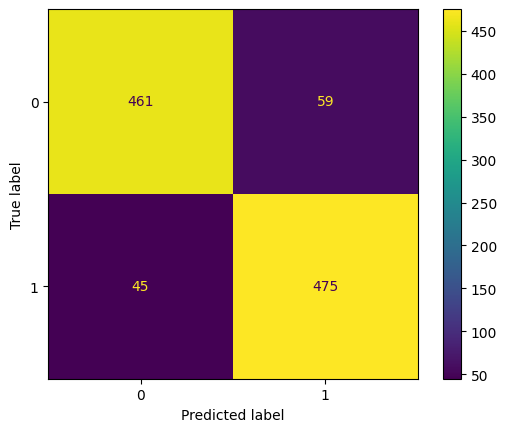

In [ ]:
eval(model_xgb, X_train, X_test)

__forward feature selection__

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
forward_selector = SequentialFeatureSelector(model_xgb, direction='forward')
forward_selector.fit(X_train, y_train)
forward_selected_features = X.columns[forward_selector.get_support()]
print(f"Selected Features: {forward_selected_features}")

Selected Features: Index(['sentence_count', 'section_count', 'paragraph_count',
       'mean_paragraph_size', 'longest_section_size', 'shortest_section_size',
       'abstract_size', 'citation_per_text', 'external_link_count',
       'link_per_text', 'image_count', 'infobox', 'largest_sentence_size',
       'question_count', 'exclamation_count', 'CLI', 'FRE', 'num_editors',
       'review_per_day', 'review_per_user', 'discussion_count',
       'revert_count'],
      dtype='object')


In [ ]:
df_forward = df.copy()
df_forward = df_forward[['sentence_count', 'section_count', 'paragraph_count',
       'mean_paragraph_size', 'longest_section_size', 'shortest_section_size',
       'abstract_size', 'citation_per_text', 'external_link_count',
       'link_per_text', 'image_count', 'infobox', 'largest_sentence_size',
       'question_count', 'exclamation_count', 'CLI', 'FRE', 'num_editors',
       'review_per_day', 'review_per_user', 'discussion_count',
       'revert_count', 'quality']]

In [ ]:
X = df_forward.iloc[:, 2:-1]
y = df_forward['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       520
           1       0.87      0.91      0.89       520

    accuracy                           0.89      1040
   macro avg       0.89      0.89      0.89      1040
weighted avg       0.89      0.89      0.89      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



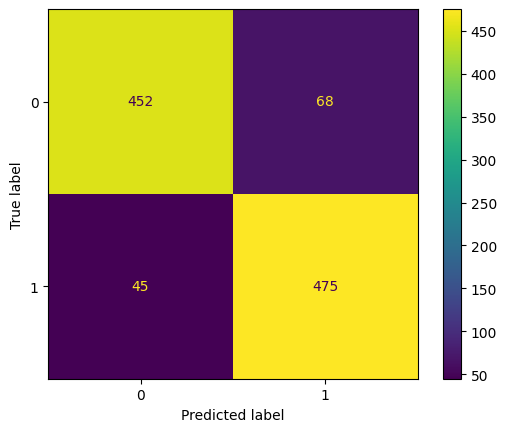

In [ ]:
eval(model_xgb, X_train, X_test)

In [ ]:
model_xgb.feature_importances_

array([0.0287585 , 0.31282037, 0.01968322, 0.02469705, 0.13030422,
       0.04675661, 0.03254206, 0.02408826, 0.01958769, 0.04636362,
       0.02179131, 0.02549779, 0.02166165, 0.02645997, 0.02879693,
       0.02129763, 0.01883043, 0.07918197, 0.05098257, 0.01989817],
      dtype=float32)

__backward feature selection__

In [ ]:
X = df.iloc[:, 2:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
backward_selector = SequentialFeatureSelector(model_xgb, direction='backward')
backward_selector.fit(X_train, y_train)
backward_selected_features = X.columns[backward_selector.get_support()]
print(f"Selected Features: {backward_selected_features}")

Selected Features: Index(['subsection_count', 'paragraph_count', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'abstract_text_ratio', 'citation_count', 'citation_per_text',
       'external_link_count', 'link_per_text', 'image_per_text', 'ARI', 'CLI',
       'FRE', 'FKG', 'SMOG', 'article_age_days', 'num_editors',
       'review_per_day', 'review_per_user', 'discussion_count'],
      dtype='object')


In [ ]:
df_backward = df.copy()
df_backward = df_backward[['subsection_count', 'paragraph_count', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'abstract_text_ratio', 'citation_count', 'citation_per_text',
       'external_link_count', 'link_per_text', 'image_per_text', 'ARI', 'CLI',
       'FRE', 'FKG', 'SMOG', 'article_age_days', 'num_editors',
       'review_per_day', 'review_per_user', 'discussion_count', 'quality']]

In [ ]:
X = df_backward.iloc[:, 2:-1]
y = df_backward['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_xgb = XGBClassifier(booster='gbtree', gamma=0, max_depth=9, min_child_weight=3)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test_Set
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       520
           1       0.89      0.91      0.90       520

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2080
           1       1.00      1.00      1.00      2080

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



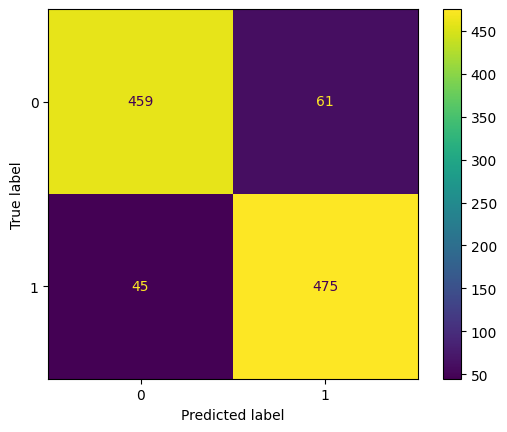

In [ ]:
eval(model_xgb, X_train, X_test)

In [ ]:
model_xgb.feature_importances_

array([0.30129987, 0.01918457, 0.02379097, 0.16816887, 0.03496782,
       0.04390014, 0.04027626, 0.02531786, 0.02046039, 0.01849155,
       0.02599268, 0.02058374, 0.02131714, 0.02937362, 0.02719287,
       0.01842844, 0.02113806, 0.02014651, 0.08313378, 0.03683472],
      dtype=float32)